In [1]:
#Load data from google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#gc collect python
import gc
gc.collect()

#del varaiable_name

0

In [0]:
!ls

gdrive	sample_data


In [0]:
!ls gdrive/"My Drive"/'Colab Notebooks'

hw5_task1.ipynb  hw5_task3.ipynb  X_df.npy  y_df.npy


In [0]:
import numpy as np

In [0]:
#check reshape
#check 
X = np.load('gdrive/My Drive/Colab Notebooks/X_df.npy')

In [0]:
y = np.load('gdrive/My Drive/Colab Notebooks/y_df.npy')

In [0]:
#subsample train data 

#class 0
condiction_y_0 = y[:,0] == 1
y_0 = y[condiction_y_0]
X_0 = X[condiction_y_0]

#class 1
condiction_y_1 = y[:,1] == 1
y_1 = y[condiction_y_1]
X_1 = X[condiction_y_1]

In [0]:
#sub  class 0
choices_0 = np.random.choice(y_0.shape[0], size= 50000)
y_0_sub = y_0[choices_0]
X_0_sub = X_0[choices_0]

#sub  class 1
choices_1 = np.random.choice(y_1.shape[0], size= 50000)
y_1_sub = y_1[choices_1]
X_1_sub = X_1[choices_1]

In [0]:
#combine to class together to get a train sub
X_sub = np.concatenate((X_0_sub, X_1_sub), axis=0)
y_sub = np.concatenate((y_0_sub, y_1_sub), axis=0)

In [28]:
print('X subset shape', X_sub.shape)
print('y subset shape', y_sub.shape)

X subset shape (100000, 50, 50, 3)
y subset shape (100000, 2)


In [0]:
from sklearn.model_selection import train_test_split
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y_sub, test_size=0.2, random_state=42)

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization
from keras.models import Sequential

num_classes = 2
cnn = Sequential()
input_shape = (50, 50, 3)
cnn.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
__________

In [0]:
cnn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [0]:
history_cnn = cnn.fit(X_train_sub, y_train_sub, batch_size=128, epochs=20, verbose=1, validation_data=[X_test_sub, y_test_sub])

Train on 80000 samples, validate on 20000 samples
Epoch 1/20
80000/80000 [==============================] - 9s 116us/step - loss: 0.0433 - acc: 0.9843 - val_loss: 1.3704 - val_acc: 0.8085
Epoch 2/20
80000/80000 [==============================] - 9s 111us/step - loss: 0.0396 - acc: 0.9857 - val_loss: 1.8214 - val_acc: 0.7553
Epoch 3/20
80000/80000 [==============================] - 9s 112us/step - loss: 0.0371 - acc: 0.9867 - val_loss: 1.0026 - val_acc: 0.8466
Epoch 4/20
80000/80000 [==============================] - 9s 111us/step - loss: 0.0345 - acc: 0.9878 - val_loss: 1.5145 - val_acc: 0.7556
Epoch 5/20
80000/80000 [==============================] - 9s 113us/step - loss: 0.0314 - acc: 0.9895 - val_loss: 0.9809 - val_acc: 0.8479
Epoch 6/20
80000/80000 [==============================] - 9s 117us/step - loss: 0.0354 - acc: 0.9879 - val_loss: 1.8482 - val_acc: 0.7148
Epoch 7/20
80000/80000 [==============================] - 9s 113us/step - loss: 0.0271 - acc: 0.9905 - val_loss: 1.2963 - 

In [0]:
scores = cnn.evaluate(X_test_sub, y_test_sub)
print("Test loss: {:.3f}".format(scores[0]))
print("Test Accuracy: {:.3f}".format(scores[1]))


20000/20000 [==============================] - 2s 87us/step
Test loss: 1.043
Test Accuracy: 0.813


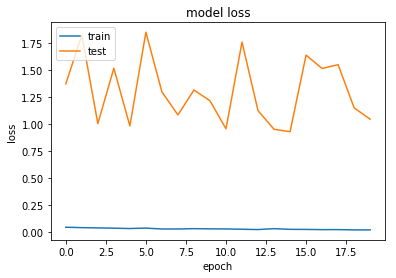

In [0]:
import matplotlib.pyplot as plt # summarize history for loss
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


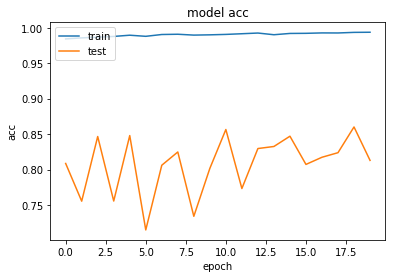

In [0]:
#need to add accuracy plot
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



From the plot of train and test loss and accuracy, i found our model is over fitting. 
The train accuracy is highly close to 1.




In [7]:
from keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization
from keras.models import Sequential

num_classes = 2
cnn_model = Sequential()
input_shape = (50, 50, 3)
cnn_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(num_classes, activation='softmax'))


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
cnn_model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])


In [0]:
#data prepocessing 
from keras.preprocessing.image import ImageDataGenerator

#the training augmentation  
train_datagen = ImageDataGenerator(
            rotation_range=10,
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
           vertical_flip=False)



In [12]:
# fits the model on batches with real-time data augmentation:
epochs = 20
batch=128

history_cnn2 = cnn_model.fit_generator(train_datagen.flow(X_train_sub, y_train_sub, batch_size=batch),
                        steps_per_epoch=len(X_train_sub) / 32, epochs=epochs, verbose=1,
                        validation_data=[X_test_sub, y_test_sub])

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
2500/2500 [==============================] - 220s 88ms/step - loss: 0.4379 - acc: 0.8170 - val_loss: 0.6001 - val_acc: 0.7459
Epoch 2/20
2500/2500 [==============================] - 217s 87ms/step - loss: 0.3973 - acc: 0.8320 - val_loss: 0.5713 - val_acc: 0.7307
Epoch 3/20
2500/2500 [==============================] - 212s 85ms/step - loss: 0.3803 - acc: 0.8387 - val_loss: 0.3943 - val_acc: 0.8306
Epoch 4/20
2500/2500 [==============================] - 211s 84ms/step - loss: 0.3696 - acc: 0.8426 - val_loss: 0.7840 - val_acc: 0.7564
Epoch 5/20
2500/2500 [==============================] - 214s 86ms/step - loss: 0.3635 - acc: 0.8452 - val_loss: 1.0840 - val_acc: 0.7052
Epoch 6/20
2500/2500 [==============================] - 207s 83ms/step - loss: 0.3582 - acc: 0.8478 - val_loss: 0.7666 - val_acc: 0.7578
Epoch 7/20
2500/2500 [==============================] - 206s 82ms/step - loss: 0.3523 - acc: 0.8513 - val_loss: 0.4195 - val_acc: 

In [13]:
scores = cnn_model.evaluate(X_test_sub, y_test_sub)
print("Test loss: {:.3f}".format(scores[0]))
print("Test Accuracy: {:.3f}".format(scores[1]))

20000/20000 [==============================] - 1s 70us/step
Test loss: 0.488
Test Accuracy: 0.799


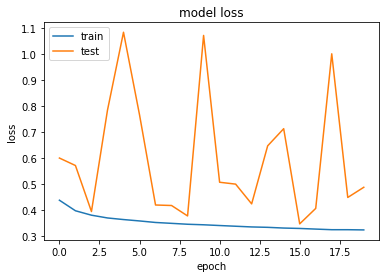

In [14]:
import matplotlib.pyplot as plt # summarize history for loss
plt.plot(history_cnn2.history['loss'])
plt.plot(history_cnn2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

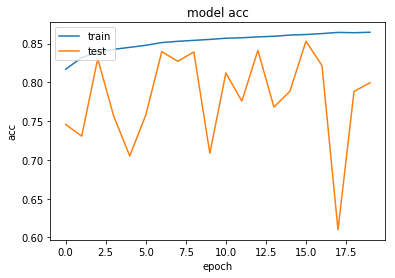

In [15]:
#need to add accuracy plot
plt.plot(history_cnn2.history['acc'])
plt.plot(history_cnn2.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


There is no improvement in the accuracy compaired with the previous model. I believe my augument parametes are in a resonable range. In future, i need to find a better way to determ the best the parameters of ImageDataGenerator. 

In [0]:
#seed the Random Numbers of tensorflow
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [9]:
from keras.models import Model
from keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization

#This is a deep model 
num_classes = 2
inputs = Input(shape=(50, 50, 3))
conv1_1 = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
conv1_2 = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(conv1_1)
conv1_3 = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(conv1_2)
maxpool1 = MaxPooling2D(pool_size=(2, 2))(conv1_3)
conv2_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool1)
conv2_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2_1)
conv2_3 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2_2)
maxpool2 = MaxPooling2D(pool_size=(2, 2))(conv2_3)
conv3_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool2)
conv3_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3_1)
conv3_3 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3_2)
maxpool3 = MaxPooling2D(pool_size=(2, 2))(conv3_3)
conv4_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool3)
conv4_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4_1)
conv4_3 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4_2)
maxpool4 = MaxPooling2D(pool_size=(2, 2))(conv4_3)
flat = Flatten()(maxpool4)
dense = Dense(64, activation='relu')(flat)
predictions = Dense(num_classes, activation='softmax')(dense)
cnn_deep = Model(inputs=inputs, outputs=predictions)

cnn_deep.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [10]:
cnn_deep.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 32)        9248      
__________

In [11]:
#train the models 
cnn_deep_his = cnn_deep.fit(X_train_sub, y_train_sub,batch_size=128, epochs=50, verbose=1, validation_data=[X_test_sub, y_test_sub])

Instructions for updating:
Use tf.cast instead.
Train on 80000 samples, validate on 20000 samples
Epoch 1/50
80000/80000 [==============================] - 28s 350us/step - loss: 0.6787 - acc: 0.5781 - val_loss: 0.5460 - val_acc: 0.7681
Epoch 2/50
80000/80000 [==============================] - 22s 281us/step - loss: 0.4650 - acc: 0.7906 - val_loss: 0.4324 - val_acc: 0.8134
Epoch 3/50
80000/80000 [==============================] - 23s 289us/step - loss: 0.4237 - acc: 0.8119 - val_loss: 0.4059 - val_acc: 0.8202
Epoch 4/50
80000/80000 [==============================] - 23s 294us/step - loss: 0.4050 - acc: 0.8235 - val_loss: 0.4015 - val_acc: 0.8314
Epoch 5/50
80000/80000 [==============================] - 23s 289us/step - loss: 0.3897 - acc: 0.8309 - val_loss: 0.3871 - val_acc: 0.8353
Epoch 6/50
80000/80000 [==============================] - 23s 288us/step - loss: 0.3767 - acc: 0.8393 - val_loss: 0.3802 - val_acc: 0.8371
Epoch 7/50
80000/80000 [==============================] - 23s 290us/

In [12]:
#evaluate models
scores = cnn_deep.evaluate(X_test_sub, y_test_sub)
print("cnn_deep Test loss: {:.3f}".format(scores[0]))
print("cnn_deep Test Accuracy: {:.3f}".format(scores[1]))

20000/20000 [==============================] - 2s 124us/step
cnn_deep Test loss: 0.339
cnn_deep Test Accuracy: 0.867


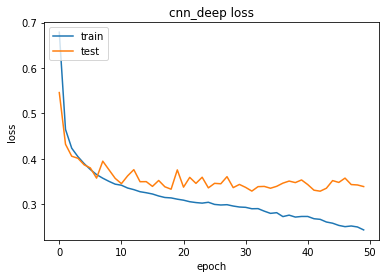

In [13]:
#show training curves 
import matplotlib.pyplot as plt 
plt.plot(cnn_deep_his.history['loss'])
plt.plot(cnn_deep_his.history['val_loss'])
plt.title('cnn_deep loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

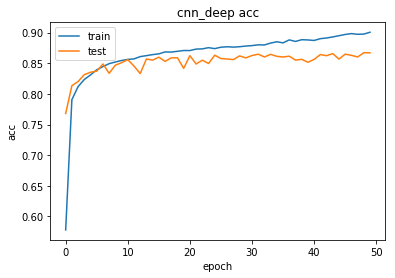

In [14]:
#show training curves 
import matplotlib.pyplot as plt 
plt.plot(cnn_deep_his.history['acc'])
plt.plot(cnn_deep_his.history['val_acc'])
plt.title('cnn_deep acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Problem with the deep networks is when deeper networks starts converging, a degradation problem occurs. As the depth of network increasing, accuracy gets saturated and then drops rapidly. Then we train a ResNet. The benefit of a ResNet is reducing the effect of vanishing gradient problem.

In [0]:
#this is a ResNet model with skip
import keras

num_classes = 2
inputs = Input(shape=(50, 50, 3))

conv1_1 = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
conv1_2 = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(conv1_1)
conv1_3 = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(conv1_2)
maxpool1 = MaxPooling2D(pool_size=(2, 2))(conv1_3)
conv2_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool1)
conv2_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2_1)
skip1 = keras.layers.add([maxpool1, conv2_2] )
conv2_3 = Conv2D(32, (3, 3), activation='relu', padding='same')(skip1)
## equivalent to added = keras.layers.add([x1, x2])
maxpool2 = MaxPooling2D(pool_size=(2, 2))(conv2_3)
conv3_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool2)
conv3_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3_1)
conv3_3 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3_2)
skip2 =  keras.layers.add([conv3_1, conv3_3])
maxpool3 = MaxPooling2D(pool_size=(2, 2))(skip2)
conv4_1 = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(maxpool3)
conv4_2 = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(conv4_1)
conv4_3 = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(conv4_2)
maxpool4 = MaxPooling2D(pool_size=(2, 2))(conv4_3)
flat = Flatten()(maxpool4)
dense = Dense(64, activation='relu')(flat)
predictions = Dense(num_classes, activation='softmax')(dense)

cnn_deep_RES_skip = Model(inputs=inputs, outputs=predictions)

cnn_deep_RES_skip.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
cnn_deep_RES_skip.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 50, 50, 3)    0                                            
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 50, 50, 32)   896         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 50, 50, 32)   9248        conv2d_25[0][0]                  
__________________________________________________________________________________________________
conv2d_27 (Conv2D)              (None, 50, 50, 32)   9248        conv2d_26[0][0]                  
__________________________________________________________________________________________________
max_poolin

In [32]:
cnn_deep_RES_skip_his = cnn_deep_RES_skip.fit(X_train_sub, y_train_sub, batch_size=128, epochs=50, verbose=1, validation_data=[X_test_sub, y_test_sub])

Train on 80000 samples, validate on 20000 samples
Epoch 1/50
80000/80000 [==============================] - 25s 311us/step - loss: 0.5212 - acc: 0.7453 - val_loss: 0.4462 - val_acc: 0.8017
Epoch 2/50
80000/80000 [==============================] - 24s 303us/step - loss: 0.4247 - acc: 0.8129 - val_loss: 0.4245 - val_acc: 0.8165
Epoch 3/50
80000/80000 [==============================] - 24s 302us/step - loss: 0.3973 - acc: 0.8283 - val_loss: 0.4183 - val_acc: 0.8170
Epoch 4/50
80000/80000 [==============================] - 24s 297us/step - loss: 0.3806 - acc: 0.8368 - val_loss: 0.4333 - val_acc: 0.8052
Epoch 5/50
80000/80000 [==============================] - 24s 296us/step - loss: 0.3701 - acc: 0.8434 - val_loss: 0.3822 - val_acc: 0.8317
Epoch 6/50
80000/80000 [==============================] - 24s 298us/step - loss: 0.3651 - acc: 0.8455 - val_loss: 0.3684 - val_acc: 0.8444
Epoch 7/50
80000/80000 [==============================] - 24s 300us/step - loss: 0.3545 - acc: 0.8499 - val_loss: 0.

In [33]:
scores = cnn_deep_RES_skip.evaluate(X_test_sub, y_test_sub)
print("cnn_deep_RES_skip Test loss: {:.3f}".format(scores[0]))
print("cnn_deep_RES_skip Test Accuracy: {:.3f}".format(scores[1]))

20000/20000 [==============================] - 3s 138us/step
cnn_deep_RES_skip Test loss: 0.488
cnn_deep_RES_skip Test Accuracy: 0.847


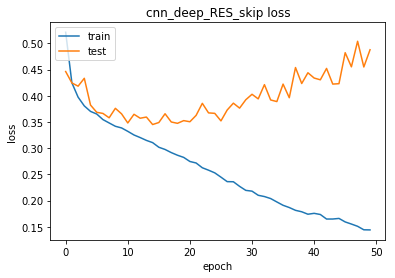

In [34]:
#show training curves 
import matplotlib.pyplot as plt 
plt.plot(cnn_deep_RES_skip_his.history['loss'])
plt.plot(cnn_deep_RES_skip_his.history['val_loss'])
plt.title('cnn_deep_RES_skip loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

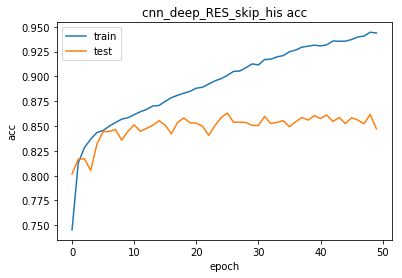

In [35]:
#show training curves 
import matplotlib.pyplot as plt 
plt.plot(cnn_deep_RES_skip_his.history['acc'])
plt.plot(cnn_deep_RES_skip_his.history['val_acc'])
plt.title('cnn_deep_RES_skip_his acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()